# GRIP : The Sparks Foundation

## Data Science and Business Analytics Intern

## Author : Shubham Mehar

**Task 2** :Using **Unsupervised ML** for the given **IRIS flower** dataset, predict the optimum number of clusters and represent it visually. 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Checking Data

The data set for this Unsupervised Machine Learning problem is taken from (https://bit.ly/3kXTdox).

In [2]:
iris=pd.read_csv("Iris.csv")

In [3]:
# Checking head

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Checking info

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


No missing values in the data.

In [5]:
# Checking Shape

iris.shape

(150, 6)

In [6]:
# Checking describe

iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# check unique names of species

iris['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# K Means Cluster Creation

In [8]:
from sklearn.cluster import KMeans

### Dropping Id and Species column

In [9]:
X=iris.drop(["Id","Species"], axis=1)

# Elbow Method

In this method the number of clusters are varies within a certain range. For each number within cluser sum of square(wss) value is calculated and stored in a list.These value are then plotted against the range of numbers of clusters used before. The location of bend **(shown by the arrow)** in the 2d plot indicates the appropriate number of clusters.

In [10]:
wcss = []              #within cluster sum of squares (WCSS)
k_rng = range(1,11)    #k range
for k in k_rng:
    km = KMeans(n_clusters = k,random_state =19) #an instance of a K Means model with k clusters
    km.fit(X)                                    #Fit the model
    wcss.append(km.inertia_)       #Inertia is the sum of squared distances of samples to their closest cluster centre

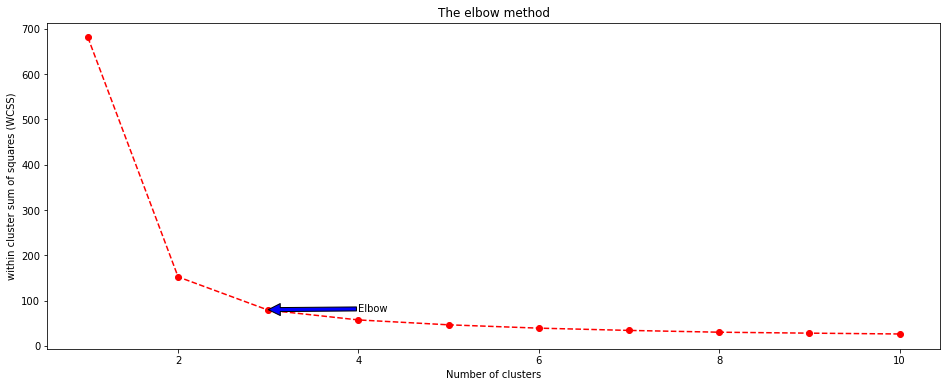

In [11]:
# Plotting the results onto a line graph, 
plt.figure(figsize=(16,6))
plt.plot(range(1, 11),wcss, "ro--")
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('within cluster sum of squares (WCSS)') 

#to create a arrow where elbow occurs based on x and y coordinate
plt.annotate('Elbow', xytext = (4,75), xy =(3, 80), arrowprops = {"facecolor" : "blue"})
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **'3'**.

In [12]:
# Applying kmeans to the dataset / Creating the kmeans classifier

km = KMeans(n_clusters = 3, random_state = 19)

y_predicted = km.fit_predict(X)

In [13]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [14]:
X["clusters"]=y_predicted
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [15]:
# centroid points

km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [16]:
# Unique values in cluster column

X.clusters.unique()

array([1, 0, 2])

In [17]:
# Creating new dataframes for clusters unique values 

X1 = X[X.clusters ==0]
X2 = X[X.clusters ==1]
X3 = X[X.clusters ==2]

In [18]:
X.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'clusters'],
      dtype='object')

# Visualising the clusters - On the first and second column

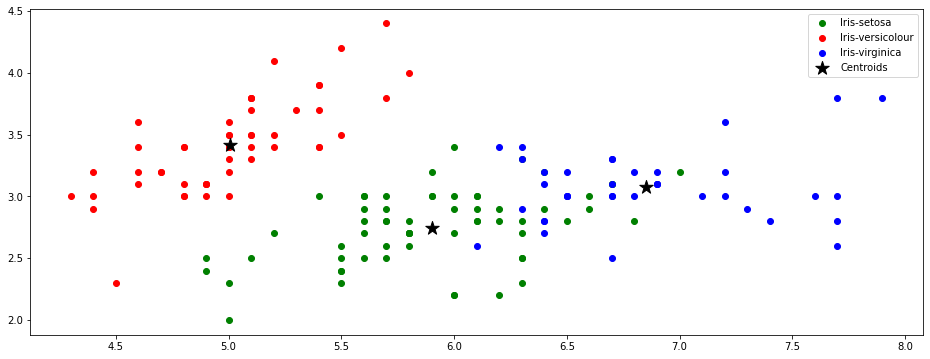

In [19]:
plt.figure(figsize=(16,6))

plt.scatter( X1['SepalLengthCm'], X1['SepalWidthCm'],c='green',label = 'Iris-setosa')

plt.scatter( X2['SepalLengthCm'], X2['SepalWidthCm'],c='red', label = 'Iris-versicolour')

plt.scatter(X3['SepalLengthCm'], X3['SepalWidthCm'],c='blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], marker='*',  s = 200, c = 'black', label = 'Centroids')

plt.legend()

# Visualising the clusters - On the third and fourth column

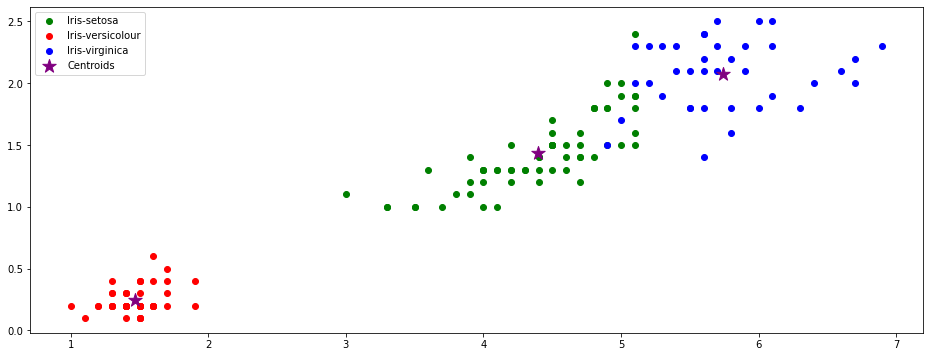

In [20]:
plt.figure(figsize=(16,6))

plt.scatter( X1['PetalLengthCm'], X1['PetalWidthCm'],c='green',label = 'Iris-setosa')

plt.scatter( X2['PetalLengthCm'], X2['PetalWidthCm'],c='red',label = 'Iris-versicolour')

plt.scatter(X3['PetalLengthCm'], X3['PetalWidthCm'],c='blue', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], marker='*', s = 200, c = 'purple', label = 'Centroids')

plt.legend()

# So, we have predicted the number of clusters and represented it visually.